In [57]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [58]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.shape

(891, 12)

In [60]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
df.duplicated().sum()

0

In [63]:
df['Age']= df['Age'].fillna(df['Age'].mean())
df[['Embarked', 'Cabin']]= df[['Embarked', 'Cabin']].ffill()
null_vals_after = df.isna().sum()
null_vals_after

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [64]:
df =df.dropna()
null_vals_after = df.isna().sum()
null_vals_after

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [65]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
labels = df.pop('Survived')

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.25)

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train['Name'] = le.fit_transform(x_train['Name'])
x_test['Name'] = le.fit_transform(x_test['Name'])
object_cols = x_train.select_dtypes(include='object').columns
for col in object_cols:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.fit_transform(x_test[col])
model.fit(x_train, y_train)

RandomForestClassifier()

In [80]:
y_pred = model.predict(x_test)

In [87]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)


0.7718881856540084

In [96]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D


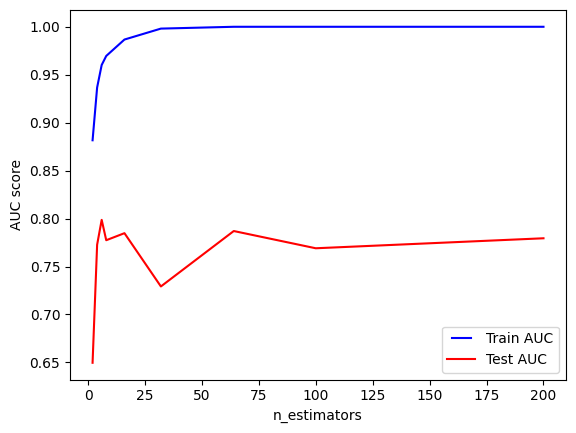

In [97]:
n_estimators = [2,4,6,8,16,32,64,100,200]
train_results = []
test_results = []

for estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=estimator, n_jobs = -1)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()